# Wikipedia Word Frequency Analysis
This notebook downloads text from multiple URLs and analyzes word frequencies.

In [1]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
import re
import matplotlib.pyplot as plt

def get_page_text(url: str) -> str:
    """Download and extract text content from a webpage.
    
    Args:
        url: URL of the webpage to download.
    
    Returns:
        str: Extracted text content from webpage.
    
    Raises:
        requests.exceptions.RequestException: If webpage download fails.
    """
    response = requests.get(url)
    response.raise_for_status()
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup.get_text()

def count_words(text: str) -> CounterType[str]:
    """Count word frequencies in text.
    
    Args:
        text: Input text to analyze.
    
    Returns:
        Counter[str]: Mapping of words to their frequencies.
    """
    words = re.findall(r'\w+', text.lower())
    return Counter(words)

def plot_frequencies(
    counts: CounterType[str],
    url: str,
    n: Optional[int] = 20
) -> None:
    """Create bar plot of most frequent words.
    
    Args:
        counts: Counter object with word frequencies.
        url: URL of analyzed webpage (for plot title).
        n: Number of top words to display. Defaults to 20.
    """
    top_words = counts.most_common(n)
    words, freqs = zip(*top_words)
    
    plt.figure(figsize=(12, 6))
    plt.bar(words, freqs)
    plt.xticks(rotation=90)
    plt.title(f"Top {n} Words in {url}")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


Analyzing https://www.princeton.edu/...


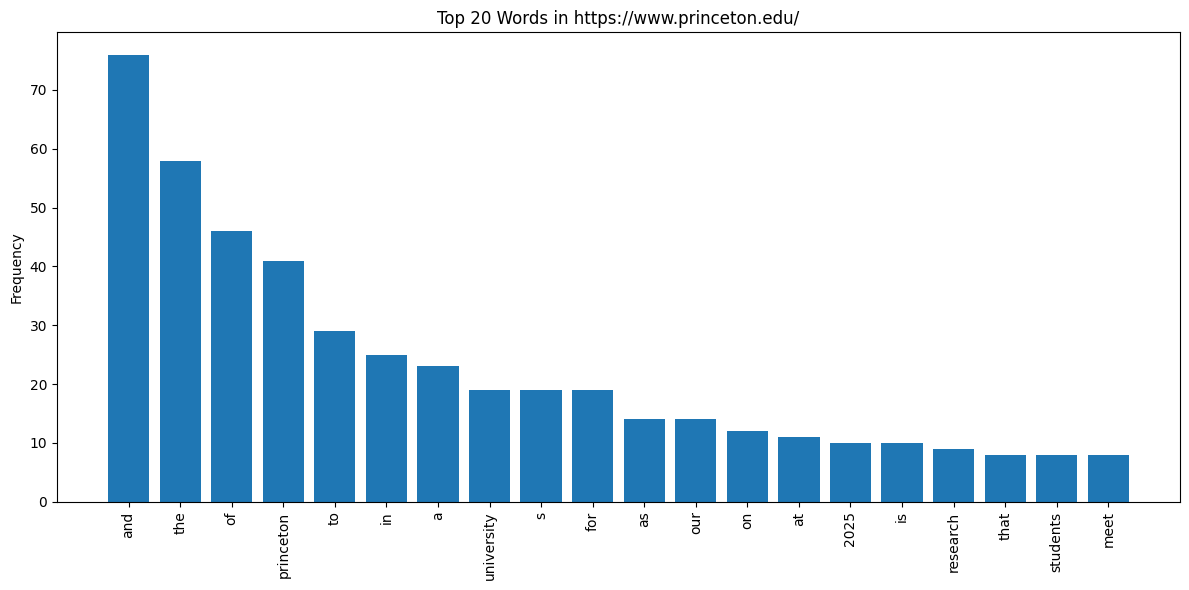


Analyzing https://snakemake.readthedocs.io/en/stable/...


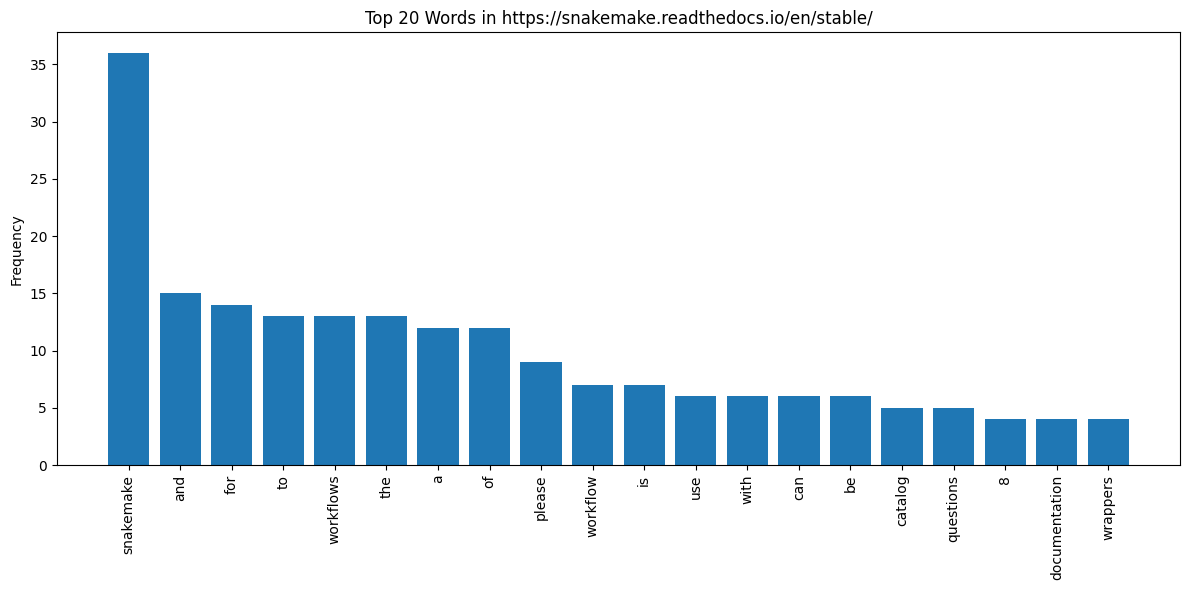

In [2]:
# List of URLs to analyze
URLS = [
    "https://www.princeton.edu/",
    "https://snakemake.readthedocs.io/en/stable/"
]

# Process each URL
for url in URLS:
    try:
        print(f"\nAnalyzing {url}...")
        text = get_page_text(url)
        counts = count_words(text)
        plot_frequencies(counts, url)
        
    except Exception as e:
        print(f"Error processing {url}: {e}")